<a href="https://colab.research.google.com/github/arthi421/Retail-Sales-/blob/main/retail_sales_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
sales = pd.read_csv("sales.csv")

In [ ]:
sales

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521403,P0572,S0050,2017-04-24,0.0,0.00,8.0,1.00,PR14,NaN,PR03,NaN,NaN,NaN
1521404,P0572,S0051,2017-04-24,0.0,0.00,16.0,1.00,PR14,NaN,PR03,NaN,NaN,NaN
1521405,P0572,S0052,2017-04-24,6.0,5.56,0.0,1.00,PR14,NaN,PR03,NaN,NaN,NaN
1521406,P0572,S0053,2017-04-24,0.0,0.00,23.0,1.00,PR14,NaN,PR03,NaN,NaN,NaN


In [ ]:
sales["stock"].describe()

count    1.521408e+06
mean     1.618612e+01
std      4.193804e+01
min      0.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.700000e+01
max      4.655000e+03
Name: stock, dtype: float64

In [ ]:
grouped = sales[["product_id", "stock", "sales"]].groupby("product_id").sum()
most_understocked = grouped[grouped["stock"] == 0].sort_values("sales", ascending = False)
most_understocked.head(5)

,stock,sales
product_id,,
P0561,0.0,295.463
P0189,0.0,286.000
P0661,0.0,240.000
P0550,0.0,202.368
P0180,0.0,129.000


In [ ]:
grouped = sales[["product_id", "stock", "sales"]].groupby("product_id").sum()
grouped["ogstock_sales_ratio"]=grouped["sales"]/(grouped["sales"]+grouped["stock"])
overstocked = grouped.sort_values("ogstock_sales_ratio", ascending = True)
overstocked.head()

,stock,sales,ogstock_sales_ratio
product_id,,,
P0141,24.0,0.0,0.000000
P0518,183.0,0.0,0.000000
P0158,184.0,0.0,0.000000
P0291,113.0,0.0,0.000000
P0218,11241.0,1.0,0.000089


In [ ]:
import matplotlib.pyplot as plt
head = 5
fig, axs = plt.subplots(head)
grouped["ogstock_sales_ratio"]=grouped["sales"]/(grouped["sales"]+grouped["stock"])

overstocked_items_by_ratio = grouped.sort_values("ogstock_sales_ratio", ascending = True)
overstocked_items_by_ratio.head(head)
overstocked_items_by_ratio = list(overstocked_items_by_ratio[0:head].index)

for i, item in enumerate(overstocked_items_by_ratio):
    ax = axs[i]
    sales[sales["product_id"] == item][["date","sales", "stock"]].plot.line(x="date", y="stock", ax=ax)
    sales[sales["product_id"] == item][["date","sales", "stock"]].plot.line(x="date", y="sales", ax=ax)
    ax.set_ylim([0, 1000])
    ax.set_yscale('symlog')
    ax.set_label(item)
fig.set_size_inches([15, 5*head])
plt.savefig("timeseries_overstocked_ratio.png")
#plt.show()

plt.clf()
overstocked_items_by_ratio = grouped.sort_values("stock", ascending = False)
overstocked_items_by_ratio.head(head)
overstocked_items_by_ratio = list(overstocked_items_by_ratio[0:head].index)

for i, item in enumerate(overstocked_items_by_ratio):
    ax = axs[i]
    sales[sales["product_id"] == item][["date","sales", "stock"]].plot.line(x="date", y="stock", ax=ax)
    sales[sales["product_id"] == item][["date","sales", "stock"]].plot.line(x="date", y="sales", ax=ax)
    ax.set_ylim([0, 1000])
    ax.set_yscale('symlog')
    ax.set_label(item)
fig.set_size_inches([15, 5*head])
plt.savefig("timeseries_overstocked_abs.png")
#plt.show()

<Figure size 1500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

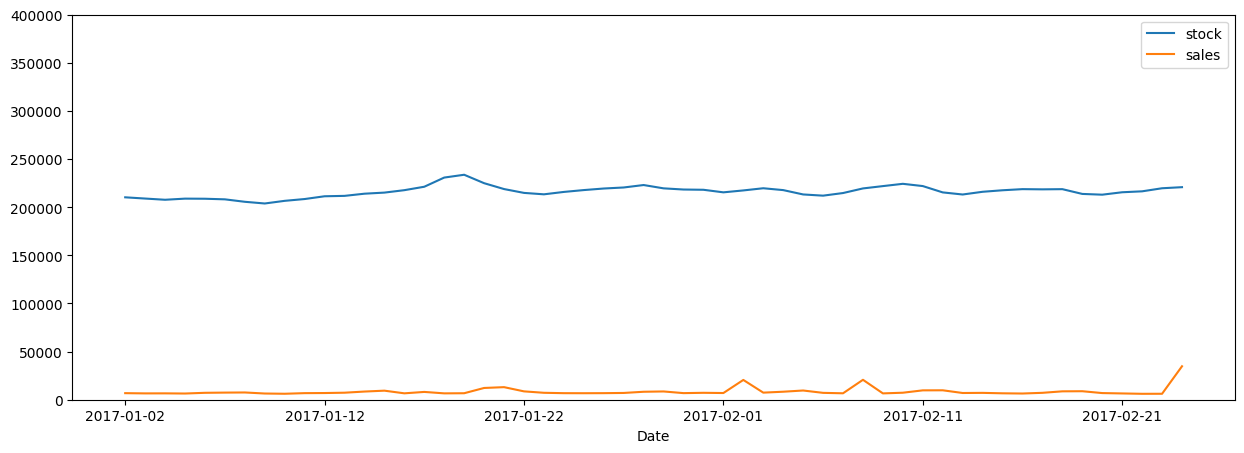

In [ ]:
from matplotlib.ticker import StrMethodFormatter

plt.clf()
grouped_day = sales[["date", "sales", "stock"]].groupby("date").sum()
grouped_day_cleaned = grouped_day[:-59]
fig, ax = plt.subplots()
grouped_day_cleaned.plot.line(y="stock", ax=ax)
grouped_day_cleaned.plot.line(y="sales", ax=ax)
ax.set_ylim([0, 4e5])
#ax.set_yscale('symlog')
ax.set_label("Total stock vs sales")
ax.set_xlabel("Date")
#ax.xaxis.set_major_formatter(StrMethodFormatter('%[-2:]'))
fig.set_size_inches([15, 5])
plt.savefig("timeseries_overstocked_all_lin.png")
plt.show()